Number of rows:  252175
Number of columns:  91
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252175 entries, 0 to 252174
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    252175 non-null  int64  
 1   S0      252175 non-null  float64
 2   S1      252175 non-null  float64
 3   S2      252175 non-null  float64
 4   S3      252175 non-null  float64
 5   S4      252175 non-null  float64
 6   S5      252175 non-null  float64
 7   S6      252175 non-null  float64
 8   S7      252175 non-null  float64
 9   S8      252175 non-null  float64
 10  S9      252175 non-null  float64
 11  S10     252175 non-null  float64
 12  S11     252175 non-null  float64
 13  S12     252175 non-null  float64
 14  S13     252175 non-null  float64
 15  S14     252175 non-null  float64
 16  S15     252175 non-null  float64
 17  S16     252175 non-null  float64
 18  S17     252175 non-null  float64
 19  S18     252175 non-null  float64
 20  S

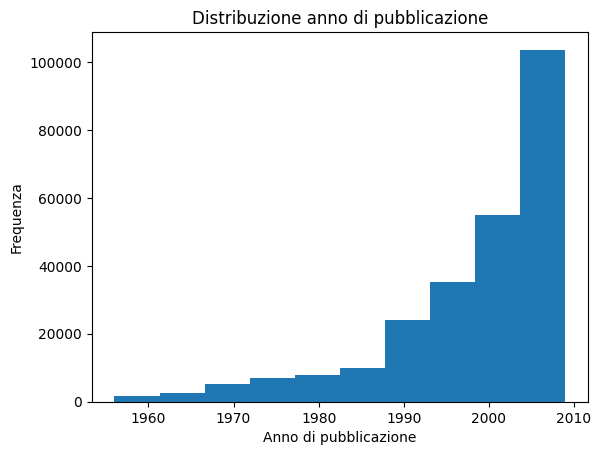

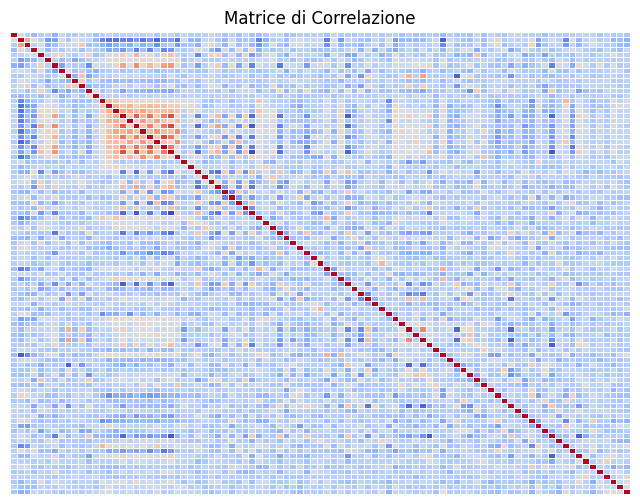

Year    0
S0      0
S1      0
S2      0
S3      0
       ..
S85     0
S86     0
S87     0
S88     0
S89     0
Length: 91, dtype: int64


,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
count,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,...,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000,252123.000000
mean,1998.350143,43.379082,1.554115,8.644903,1.160495,-6.526296,-9.531860,-2.367001,-1.788615,3.712732,...,15.724619,-73.286196,41.487949,38.044051,0.334009,17.931321,-26.509443,4.488371,19.873068,1.309111
std,10.497821,6.066799,51.553786,35.236419,16.336976,22.842798,12.809783,14.531206,7.963667,10.554074,...,31.984394,174.926010,122.250505,94.579907,16.021250,114.048957,173.685614,13.286652,185.161556,22.113446
min,1956.000000,3.455260,-334.953220,-301.005060,-149.962040,-181.953370,-72.717370,-111.017810,-68.404510,-119.762620,...,-437.722030,-2984.920970,-1810.689190,-1848.702260,-272.289050,-2343.894110,-3819.933620,-233.456480,-7458.378150,-286.031200
25%,1994.000000,39.959190,-25.652865,-11.525215,-8.492365,-20.588825,-18.403075,-10.770910,-6.473035,-2.296255,...,-1.788015,-139.031800,-21.015265,-4.631245,-6.749575,-31.247580,-102.179795,-2.536405,-59.734690,-8.819860
50%,2002.000000,44.250210,8.654700,10.517340,-0.641620,-5.998880,-11.189760,-2.072920,-1.727880,3.821940,...,9.132190,-53.171760,28.675010,33.593230,0.818240,15.846730,-21.623440,3.145800,7.775050,0.062890
75%,2006.000000,47.823030,36.250215,29.795445,8.767810,7.740135,-2.448085,6.512805,2.913495,9.938115,...,26.208285,13.413625,89.185855,77.879375,8.451960,67.776985,51.887175,9.999690,85.829385,9.651235
max,2009.000000,61.970140,384.065730,318.868960,228.412110,262.068870,166.236890,160.815220,82.942190,92.792850,...,840.973380,4469.454870,3210.701700,1734.079690,199.121500,3662.065650,2833.608950,275.353660,7240.653730,600.766240


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df

num_rows, num_cols = df.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

df.info()

duplicates = df.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

df = df.drop_duplicates()
df

plt.hist(df['Year'])
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()

matrix_corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrix_corr, annot=False, cmap='coolwarm', fmt=".2f",linewidths=.5, xticklabels=False, yticklabels=False, cbar=False)
plt.title('Matrice di Correlazione')
plt.show()

matrix_corr

print(df.isnull().sum())

df.describe()

## Varie Normalizzazioni

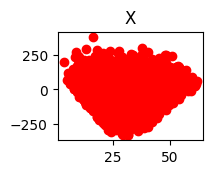

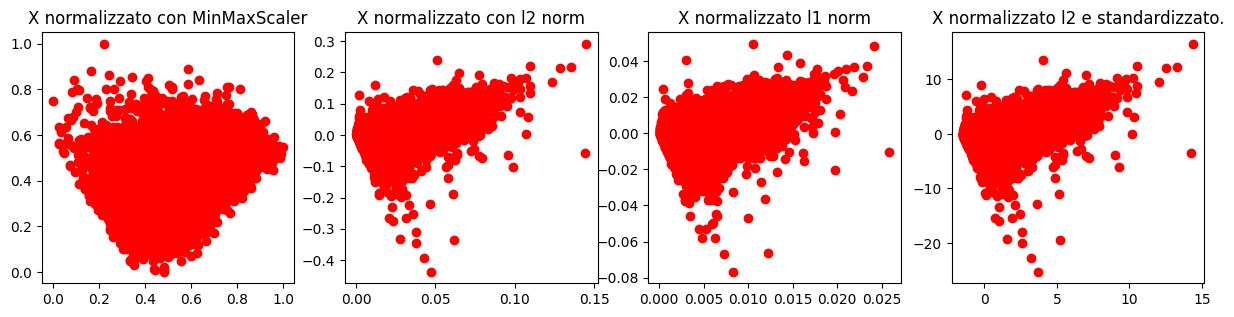

In [87]:
from sklearn import preprocessing

Y = df.iloc[:, 0]   # Year
X = df.iloc[:, 1:]  # Features

# Inizializza lo scaler
scaler = preprocessing.MinMaxScaler()

plt.subplot(331)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='r')  # Utilizza il metodo .iloc per l'indicizzazione
plt.title('X')

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
# scaler = preprocessing.StandardScaler()
# scaler.fit(X)
# X_standardized2 = scaler.transform(X)

# Applica la normalizzazione Min-Max alle features
normalized_features = scaler.fit_transform(X)

X_normalized2 = preprocessing.normalize(X, norm='l2')  # l1, l2, max

X_normalized1 = preprocessing.normalize(X, norm='l1') # l1, l2, max


X_normalized2_standardized = ( X_normalized2 - np.mean(X_normalized2, axis=0) )/ np.std(X_normalized2, axis=0)

plt.figure(figsize=(15, 15))

plt.subplot(441)
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c='r')
plt.title('X normalizzato con MinMaxScaler')

plt.subplot(442)
plt.scatter(X_normalized2[:, 0], X_normalized2[:, 1], c='r')
plt.title('X normalizzato con l2 norm')

plt.subplot(443)
plt.scatter(X_normalized1[:,0], X_normalized1[:,1], c='r')
plt.title('X normalizzato l1 norm')

plt.subplot(444)
plt.scatter(X_normalized2_standardized[:,0], X_normalized2_standardized[:,1], c='r')
plt.title('X normalizzato l2 e standardizzato.')


plt.show()

## Prova vari modelli

**Linear Regression**


Beta_0: 
 [ 8.52855207e-01 -5.89926802e-02 -3.94887103e-02  2.07565438e-03
 -1.79487437e-02 -2.09221907e-01 -9.15942625e-03 -1.02023815e-01
 -7.68231191e-02  5.17282419e-02 -1.57469881e-01  3.63263159e-03
  4.38969537e-02  3.50056314e-04 -4.07767446e-04  5.55744884e-04
  5.64477802e-04  1.50800759e-03  1.65148196e-03  1.94681123e-03
  9.42046350e-04 -4.92802550e-04  7.59097150e-03  2.98073454e-03
 -3.33472793e-03  9.02992495e-05  1.53312148e-03  4.93558915e-04
  8.51181608e-04  1.39332509e-05 -1.44766746e-03 -2.05133967e-03
 -5.11750503e-03  2.04578068e-03 -3.24455698e-04 -5.61865187e-03
 -2.37427586e-04  6.42939889e-04  1.36029240e-03 -1.32027177e-03
 -1.55759663e-03 -5.57216622e-04 -1.31974103e-03 -2.43529442e-03
 -4.10224458e-03  7.14113747e-03  3.99760140e-04 -1.64571934e-03
  3.75705791e-04  1.56914734e-03  7.50132984e-04 -1.34399313e-03
  1.96232281e-03  7.69065103e-04 -4.44271404e-04  2.90111161e-04
 -1.89772550e-03  2.17303281e-03 -1.05503480e-03  2.24050302e-04
 -2.61624968e-0

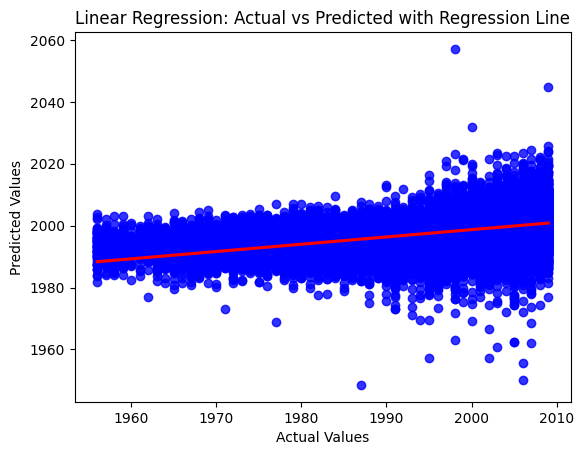

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Split the original dataset into test/train sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

regr = LinearRegression()

# Fit the data
regr.fit(X_train, Y_train)

# Compute predicted values Y^
y_pred = regr.predict(X_test)

# Show the beta coefficients
print('Beta_0: \n', regr.coef_)
print('Beta_1: \n', regr.intercept_)

# Compute the RSS
mse=mean_squared_error(Y_test, y_pred)
print('\nMean Square Error:’',mse)

# Compute the R-square index
rsquare = r2_score(Y_test, y_pred)
print('R-square:', rsquare)

# Plot the predicted values against the actual values with regression line
sns.regplot(x=Y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Linear Regression: Actual vs Predicted with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()



**Random Forest Regression**

Mean Squared Error: 77.91882187010413
R-squared: 0.2850992338574522


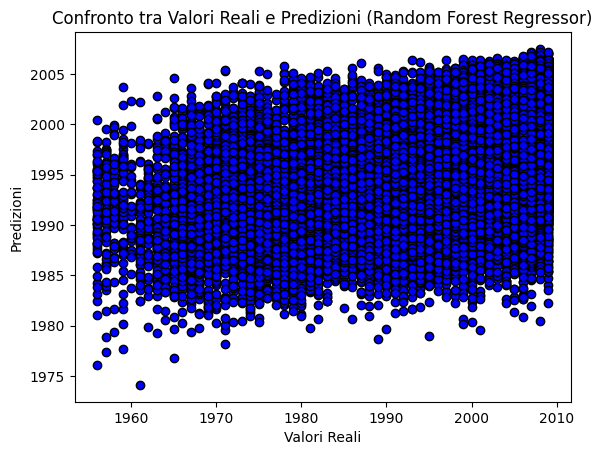

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Creazione e addestramento del modello
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, Y_train)

# Predizioni sul set di test
y_pred = random_forest_model.predict(X_test)

# Calcolo delle metriche di valutazione
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizzazione delle predizioni rispetto ai valori reali
plt.scatter(Y_test, y_pred, c='blue', edgecolors='k')
plt.xlabel('Valori Reali')
plt.ylabel('Predizioni')
plt.title('Confronto tra Valori Reali e Predizioni (Random Forest Regressor)')
plt.show()


**Random Forest Regressor With PCA**

Mean Squared Error with PCA: 102.76978488646505
R-squared with PCA: 0.057093059310901695


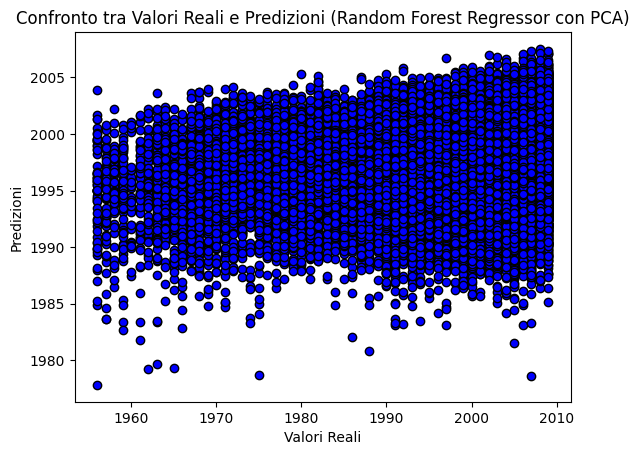

In [93]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Suddividi il dataset in set di addestramento e di test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applica PCA
pca = PCA(n_components=10)  # Imposta il numero desiderato di componenti principali
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Creazione e addestramento del modello Random Forest Regressor con dati ridotti
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_pca, Y_train)

# Predizioni sul set di test
y_pred = random_forest_model.predict(X_test_pca)

# Calcolo delle metriche di valutazione
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred=y_pred)

print(f'Mean Squared Error with PCA: {mse}')
print(f'R-squared with PCA: {r2}')

# Visualizzazione delle predizioni rispetto ai valori reali
plt.scatter(Y_test, y_pred, c='blue', edgecolors='k')
plt.xlabel('Valori Reali')
plt.ylabel('Predizioni')
plt.title('Confronto tra Valori Reali e Predizioni (Random Forest Regressor con PCA)')
plt.show()


In [91]:
""" import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
import matplotlib.pyplot as plt
from sklearn import preprocessing


translate_X = 0 # -2
translate_Z = 2 # -2
magnitude_X = 3 # try 1000!
magnitude_Z = 2 # 


# Our dataset composed by 100 samples and 2 variables
X = np.random.uniform(-magnitude_X,magnitude_X, size=(100,2)) + translate_X
X[:,1] = X[:,1]  # try this!


# Normalization
# X_norm2 = np.linalg.norm(X, ord=2, axis=1, keepdims=True)
# X_normalized2 = X / X_norm2
X_normalized2 = preprocessing.normalize(X, norm='l2') # l1, l2, max

X_norm1 = np.linalg.norm(X, ord=1, axis=1, keepdims=True)
X_normalized1 = X / X_norm1
# X_normalized1 = preprocessing.normalize(X, norm='l1') # l1, l2, max


# Standardization, assumption: X is the training set
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
# scaler = preprocessing.StandardScaler()
# scaler.fit(X)
# X_standardized2 = scaler.transform(X)


# Min-Max scaling, assumption: X is the training set
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_scaled = (X - X_min) / (X_max - X_min)
# scaler = preprocessing.MinMaxScaler()
# scaler.fit(X)
# X_scaled2 = scaler.transform(X)


# A bit strange...
X_normalized2_standardized = ( X_normalized2 - np.mean(X_normalized2, axis=0) )/ np.std(X_normalized2, axis=0)


plt.subplot(331)
plt.scatter(X[:,0], X[:,1], c='r')
plt.title('X')

plt.subplot(332)
plt.scatter(X_normalized2[:,0], X_normalized2[:,1], c='r')
plt.title('X normalized l2')

plt.subplot(333)
plt.scatter(X_normalized1[:,0], X_normalized1[:,1], c='r')
plt.title('X normalized l1')

plt.subplot(334)
plt.scatter(X_standardized[:,0], X_standardized[:,1], c='r')
plt.title('X standardized')

plt.subplot(335)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c='r')
plt.title('X scaled min-max')

plt.subplot(336)
plt.scatter(X_normalized2_standardized[:,0], X_normalized2_standardized[:,1], c='r')
plt.title('X norm. l2 and stand.')


# Another dataset
Z = np.random.uniform(-magnitude_Z,magnitude_Z, size=(100,2)) + translate_Z


Z_mean = np.mean(Z, axis=0)
Z_std = np.std(Z, axis=0)

Z_standardizedZ = (Z - Z_mean) / Z_std

Z_standardizedX = (Z - X_mean) / X_std


plt.subplot(337)
plt.scatter(X[:,0], X[:,1], c='r')
plt.scatter(Z[:,0], Z[:,1], c='b')
plt.title('X and Z')

plt.subplot(338)
plt.scatter(X_standardized[:,0], X_standardized[:,1], c='r')
plt.scatter(Z_standardizedZ[:,0], Z_standardizedZ[:,1], c='b')
plt.title('X stand. / Z stand.')

plt.subplot(339)
plt.scatter(X_standardized[:,0], X_standardized[:,1], c='r')
plt.scatter(Z_standardizedX[:,0], Z_standardizedX[:,1], c='b')
plt.title('X stand. / Z stand. wrt X')

plt.subplots_adjust(right=1.5,top=1.5)
plt.show() """

" import numpy as np\nimport matplotlib\nmatplotlib.rcParams.update({'font.size': 10})\nimport matplotlib.pyplot as plt\nfrom sklearn import preprocessing\n\n\ntranslate_X = 0 # -2\ntranslate_Z = 2 # -2\nmagnitude_X = 3 # try 1000!\nmagnitude_Z = 2 # \n\n\n# Our dataset composed by 100 samples and 2 variables\nX = np.random.uniform(-magnitude_X,magnitude_X, size=(100,2)) + translate_X\nX[:,1] = X[:,1]  # try this!\n\n\n# Normalization\n# X_norm2 = np.linalg.norm(X, ord=2, axis=1, keepdims=True)\n# X_normalized2 = X / X_norm2\nX_normalized2 = preprocessing.normalize(X, norm='l2') # l1, l2, max\n\nX_norm1 = np.linalg.norm(X, ord=1, axis=1, keepdims=True)\nX_normalized1 = X / X_norm1\n# X_normalized1 = preprocessing.normalize(X, norm='l1') # l1, l2, max\n\n\n# Standardization, assumption: X is the training set\nX_mean = np.mean(X, axis=0)\nX_std = np.std(X, axis=0)\nX_standardized = (X - X_mean) / X_std\n# scaler = preprocessing.StandardScaler()\n# scaler.fit(X)\n# X_standardized2 = scale